In [48]:
import pandas as pd
import numpy as np

In [49]:
data = pd.read_csv("merged_data.csv")
schools_final = pd.read_csv("SchoolsFinal.csv")

In [50]:
data_n = data.select_dtypes(include = ["number"])

In [51]:
#creating a multiclass classification model
X = data_n.drop(["Y2C"], axis = 1)

In [52]:
data_n = data_n[~data_n["Y2C"].isin([-2, -3,-4])]

In [89]:
imputer = SimpleImputer(strategy = "median")
closed_data = data_n[data_n["Y2C"] != -1]
open_data = data_n[data_n["Y2C"] == -1]

open_data_imputed = imputer.fit_transform(open_data)
closed_data_imputed = imputer.fit_transform(closed_data)

open_data_imputed_df = pd.DataFrame(open_data_imputed, columns = open_data.columns)
closed_data_imputed_df = pd.DataFrame(closed_data_imputed, columns = closed_data.columns)

full_data = pd.concat([closed_data_imputed_df, open_data_imputed_df], axis = 0)

full_data.head()

,Unnamed: 0,UNITID,Year,YearClosed,Y2C,Closing,Total_Assets,Total_Liabilities,Buildings_Ending_Balance,Total_for_Plant_Ending_Balance,...,EFYUNKNW,EFTEUG,SFAFORM,FTEMP15,F2PELL,F_ATHLTC,EFYASIAM,EFYASIAW,EFYHISPT,EFYHISPM
0,178.0,110918.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,44.0,13.0
1,248.0,115728.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,44.0,13.0
2,589.0,137801.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,44.0,13.0
3,828.0,149763.0,2023.0,2024.0,1.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,44.0,13.0
4,905.0,153621.0,2023.0,2023.0,0.0,0.0,7117677.5,3087854.5,1184400.0,3599222.0,...,7.0,374.5,1.0,1.0,1.0,3.0,2.0,4.0,44.0,13.0


In [90]:
X = full_data.drop(["Y2C"], axis = 1)
y = full_data["Y2C"]

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
model = RandomForestClassifier(random_state = 42)

In [96]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
y_pred = model.predict(X_test)

In [98]:
print(confusion_matrix(y_test, y_pred))

[[7035    0    0    0    0    0    0    0    0    0    0]
 [   0   28    5    0    0    0    0    0    0    0    0]
 [   0    3   25    0    0    0    1    0    0    0    0]
 [   0    0    0   12    6    1    0    0    0    0    0]
 [   0    0    0   19    2    4    0    0    0    0    0]
 [   0    0    0    6   14    1    0    0    0    0    0]
 [   0    0    4    0    0    0    3    5    1    0    0]
 [   0    0    2    0    0    0    9    0    0    0    0]
 [   0    0    1    0    0    0    0    2    0    1    0]
 [   0    0    0    0    0    0    0    0    4    0    0]
 [   0    0    0    0    0    0    0    0    0    1    0]]


In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7035
           1       0.90      0.85      0.88        33
           2       0.68      0.86      0.76        29
           3       0.32      0.63      0.43        19
           4       0.09      0.08      0.09        25
           5       0.17      0.05      0.07        21
           6       0.23      0.23      0.23        13
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1

    accuracy                           0.99      7195
   macro avg       0.31      0.34      0.31      7195
weighted avg       0.99      0.99      0.99      7195



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: ylabel='Count'>

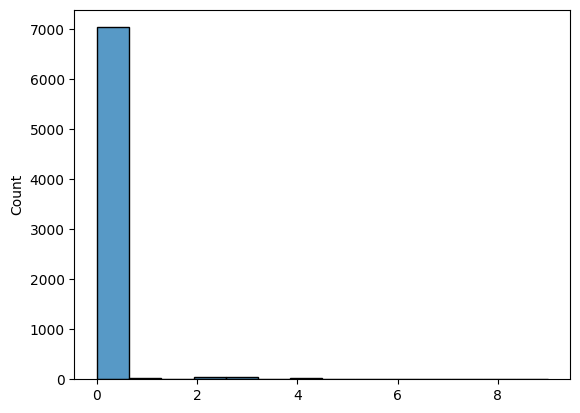

In [117]:
sns.histplot(y_pred)

In [77]:
from sklearn.impute import SimpleImputer

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(multi_class="multinomial", solver = "lbfgs", max_iter = 1000)

log_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [109]:
log_preds = log_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [110]:
print(confusion_matrix(y_test, log_preds))

[[2778   53   10  374    0  353  314   61 3092    0    0]
 [   2    0    0    1    0    0   30    0    0    0    0]
 [   4    0    0    2    0    0   18    0    5    0    0]
 [   5    0    0    1    0    0   10    0    3    0    0]
 [   5    1    0    3    0    0   12    0    4    0    0]
 [   6    0    0    2    0    0    8    0    5    0    0]
 [   3    0    0    1    0    0    5    0    4    0    0]
 [   1    0    0    2    0    0    6    0    2    0    0]
 [   1    0    0    1    0    0    2    0    0    0    0]
 [   2    0    0    0    0    0    0    0    2    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0]]


In [ ]:
#random forest worked much better

In [111]:
import tensorflow as tf

In [113]:
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "softmax")
])

tf_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

tf_model_history = tf_model.fit(X_train_scaled, y_train, epochs =10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0045 - loss: 0.0000e+00
Epoch 2/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0041 - loss: 0.0000e+00
Epoch 3/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0050 - loss: 0.0000e+00
Epoch 4/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0047 - loss: 0.0000e+00
Epoch 5/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0043 - loss: 0.0000e+00
Epoch 6/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0047 - loss: 0.0000e+00
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0045 - loss: 0.0000e+00
Epoch 8/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0051 - loss: 0.0000e+00
Epoch 9/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0053 - loss: 0.0000e+00
Epoch 10/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0044 - loss: 0.0000e+00
